In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
df = pd.read_csv('kc_house_data.csv')

In [63]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [64]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [65]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'grade', 'yr_built', 'condition']
X = df[features]
y = df['price']

In [66]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,condition
0,3,1.00,1180,5650,1.0,7,1955,3
1,3,2.25,2570,7242,2.0,7,1951,3
2,2,1.00,770,10000,1.0,6,1933,3
3,4,3.00,1960,5000,1.0,7,1965,5
4,3,2.00,1680,8080,1.0,8,1987,3
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,8,2009,3
21609,4,2.50,2310,5813,2.0,8,2014,3
21610,2,0.75,1020,1350,2.0,7,2009,3
21611,3,2.50,1600,2388,2.0,8,2004,3


In [67]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [69]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
y_pred = regressor.predict(X_test)

In [71]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

          Actual     Predicted
17384   297000.0  2.853534e+05
722    1578000.0  1.573804e+06
2680    562100.0  5.425567e+05
18754   631500.0  5.903389e+05
14554   780000.0  7.971313e+05
16227   485000.0  2.899917e+05
6631    340000.0  4.866359e+05
19813   335606.0  5.498993e+05
3367    425000.0  6.542938e+05
21372   490000.0  1.149422e+06


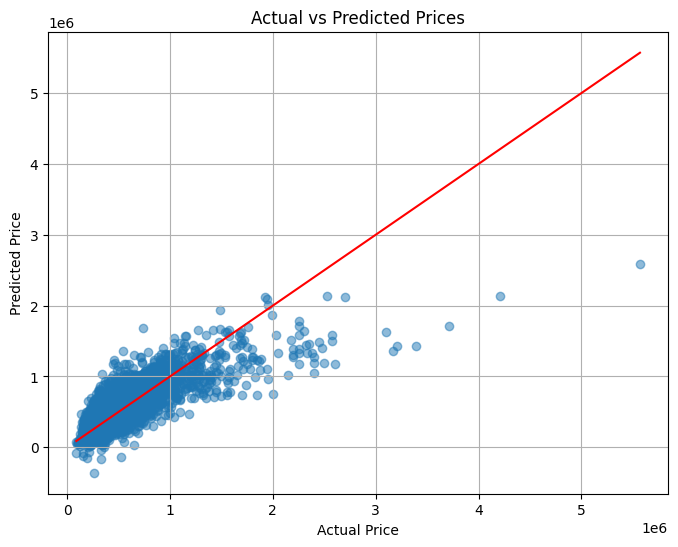

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # 45-degree line
plt.grid(True)
plt.show()

In [73]:
from joblib import dump, load # dump is used to save the model and load is used to load the model
with open('models/house_pred.pkl', 'wb') as f:
    dump(regressor, f) # dumping the model to a file
    print("Model Dumped Successfully")

Model Dumped Successfully


In [74]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.6237006381609217
